In [9]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers 

In [3]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)


Epoch 1/15
858/857 [==============================] - 43s 50ms/step - loss: 2.8148 - acc: 0.1451 - val_loss: 2.1766 - val_acc: 0.3118
Epoch 2/15
858/857 [==============================] - 43s 50ms/step - loss: 2.0473 - acc: 0.3549 - val_loss: 1.4318 - val_acc: 0.5238
Epoch 3/15
858/857 [==============================] - 41s 48ms/step - loss: 1.6730 - acc: 0.4617 - val_loss: 1.0278 - val_acc: 0.6627
Epoch 4/15
858/857 [==============================] - 43s 50ms/step - loss: 1.4387 - acc: 0.5347 - val_loss: 0.9661 - val_acc: 0.6832
Epoch 5/15
858/857 [==============================] - 40s 47ms/step - loss: 1.2789 - acc: 0.5846 - val_loss: 0.7557 - val_acc: 0.7464
Epoch 6/15
858/857 [==============================] - 42s 49ms/step - loss: 1.1483 - acc: 0.6280 - val_loss: 0.6893 - val_acc: 0.7652
Epoch 7/15
858/857 [==============================] - 43s 50ms/step - loss: 1.0674 - acc: 0.6463 - val_loss: 0.5681 - val_acc: 0.8123
Epoch 8/15
858/857 [==============================] - 43s 50ms

[154.42131806696452, 0.6518405]

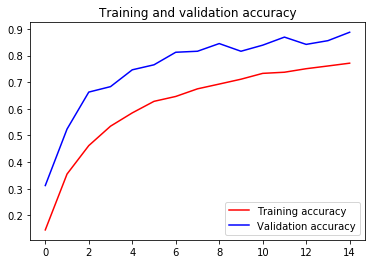

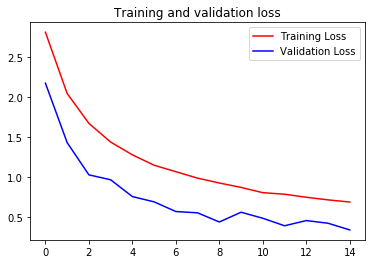

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()